In [0]:
!pip install matplotlib==3.1.0

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plot graphics
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [0]:
# Reading our files
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [0]:
#train.info
train.head(n=10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [0]:
#test.info
test.head(n=10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,37061,Male,19.0,0,0,No,Private,Rural,92.61,16.8,never smoked
1,42333,Male,53.0,0,0,Yes,Govt_job,Urban,94.03,26.5,NaN
2,58964,Female,51.0,0,0,Yes,Private,Rural,127.22,31.0,smokes
3,34063,Female,17.0,0,0,No,Private,Rural,112.15,19.8,NaN
4,43682,Female,41.0,0,0,Yes,Govt_job,Urban,112.17,27.5,never smoked
5,9789,Female,23.0,0,0,No,Private,Urban,86.54,28.1,smokes
6,6626,Female,21.0,0,0,Yes,Private,Urban,91.70,29.2,never smoked
7,12566,Female,42.0,0,0,Yes,Private,Urban,98.36,41.5,never smoked
8,27269,Female,37.0,0,0,Yes,Govt_job,Urban,94.59,30.0,NaN
9,47282,Female,19.0,0,0,No,Private,Rural,141.94,27.0,NaN


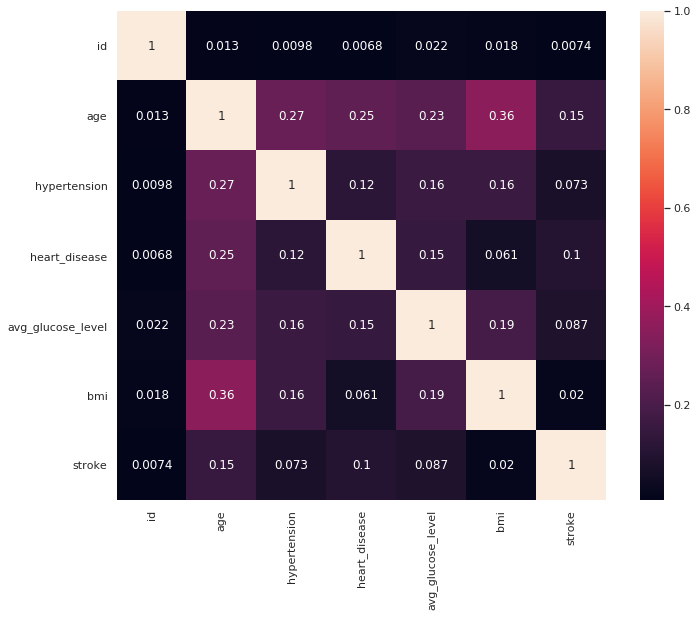

In [0]:
#We can see that the numerical variables weakly correlate. And we can conclude almost all variables will used further
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

In [0]:
# Just observe the data in files
train['stroke'].value_counts()

0    29471
1      530
Name: stroke, dtype: int64

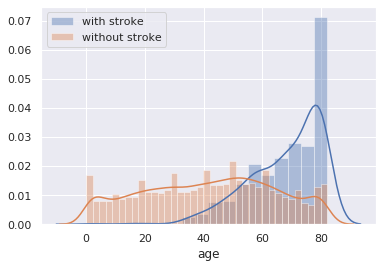

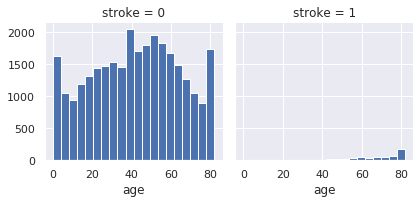

In [0]:
# The destribution of ages between people with and without stroke
# Just look at the dependence. We can see that elder people have stoke frequently that young people 
sns.distplot(train.loc[train['stroke']==1]['age'], label='with stroke')
sns.distplot(train.loc[train['stroke']==0]['age'], label='without stroke')
plt.legend()
sns.FacetGrid(train, col='stroke').map(plt.hist, 'age', bins=20)


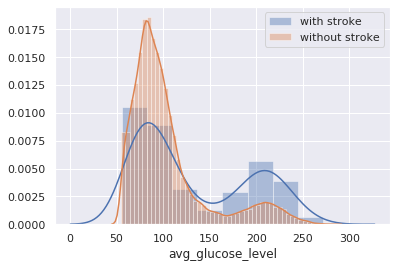

In [0]:
# The destribution of avg_glucose_level between people with and without stroke
sns.distplot(train.loc[train['stroke']==1]['avg_glucose_level'], label='with stroke')
sns.distplot(train.loc[train['stroke']==0]['avg_glucose_level'], label='without stroke')
plt.legend()

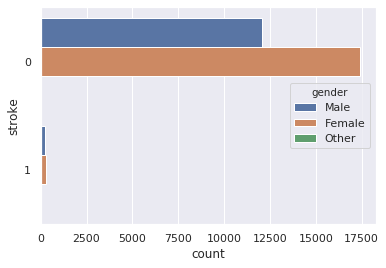

In [0]:
# The distribution of gender and having stroke
sns.countplot(y=train['stroke'], hue=train['gender'])

In [0]:
# some statistics of train data with stroke=1
# we can observe and compare the mean values of columns with 1 and 0 in stroke
# maybe it will hepl us to choose features
train.loc[train['stroke']==1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,530.000000,530.000000,530.000000,530.000000,530.000000,438.000000,530.0
mean,37537.015094,67.844000,0.254717,0.209434,132.794377,29.937900,1.0
std,20507.492017,12.578173,0.436114,0.407289,61.218296,6.346629,0.0
min,210.000000,1.320000,0.000000,0.000000,55.700000,14.300000,1.0
25%,20846.500000,59.000000,0.000000,0.000000,80.772500,25.700000,1.0
50%,36767.000000,71.000000,0.000000,0.000000,105.855000,29.350000,1.0
75%,55701.000000,78.000000,1.000000,0.000000,197.190000,33.275000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [0]:
# some statistics of train data with stroke=1
train.loc[train['stroke']==0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29471.000000,29471.000000,29471.000000,29471.000000,29471.000000,28546.000000,29471.0
mean,36359.001323,41.816523,0.091649,0.044926,104.090983,28.642146,0.0
std,21076.661971,22.328541,0.288535,0.207144,42.690452,7.799156,0.0
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.0
25%,17954.500000,24.000000,0.000000,0.000000,77.470000,23.200000,0.0
50%,36505.000000,43.000000,0.000000,0.000000,91.450000,27.800000,0.0
75%,54526.500000,59.000000,0.000000,0.000000,111.760000,33.000000,0.0
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,0.0


From comparison the info from train data (with or without stroke) one sees the correlation in age, hypertension, heart_disease


In [0]:
# Count the empty cells in train data an test data
# And after fill with different methods
for i in train.columns:
    print(i, (pd.isnull(train[i])).sum())

for i in test.columns:
  print(i, (pd.isnull(test[i])).sum())

id 0
gender 0
age 0
hypertension 0
heart_disease 0
ever_married 0
work_type 0
Residence_type 0
avg_glucose_level 0
bmi 1017
smoking_status 9176
stroke 0
id 0
gender 0
age 0
hypertension 0
heart_disease 0
ever_married 0
work_type 0
Residence_type 0
avg_glucose_level 0
bmi 445
smoking_status 4116


# Fill empty cells 


In [0]:
#fill nan cells with mean value
mean_bmi_train = train['bmi'].mean()
mean_bmi_test = test['bmi'].mean()
train['bmi'] = train['bmi'].fillna(mean_bmi_train)
test['bmi'] = test['bmi'].fillna(mean_bmi_test)

In [0]:
print(mean_bmi_train, mean_bmi_test)

28.66172715981227 28.477298340408908


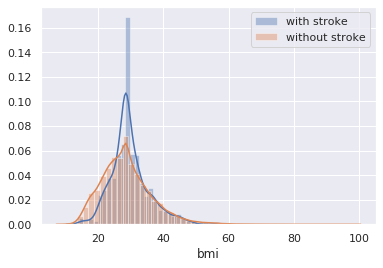

In [0]:
#Once can see that the fill with the mean value in that case is bad, that's why maybe fill with zeros or we can not to observe that feature
sns.distplot(train.loc[train['stroke']==1]['bmi'], label='with stroke')
sns.distplot(train.loc[train['stroke']==0]['bmi'], label='without stroke')
plt.legend()

In [0]:
train['bmi'] = train['bmi'].replace(mean_bmi_train, 0)
test['bmi'] = test['bmi'].replace(mean_bmi_test, 0)

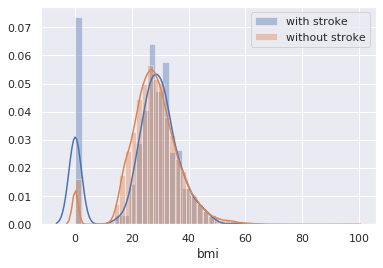

In [0]:
#from that analysis I conclude not to include this feature 
#because it has the same distribution
sns.distplot(train.loc[train['stroke']==1]['bmi'], label='with stroke')
sns.distplot(train.loc[train['stroke']==0]['bmi'], label='without stroke')
plt.legend()

In [0]:
train['smoking_status'] = train['smoking_status'].fillna('nan')
test['smoking_status'] = test['smoking_status'].fillna('nan')

# One-hot Encoding (work_type, smoking_status)

In [0]:
from sklearn.preprocessing import LabelEncoder
categ_cols = ['work_type', 'smoking_status']

label_encoder = LabelEncoder()
for col in categ_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])

Smoking_status:
1.   Formely_smoked = 0
2.   nan = 1
1.   never_smoked = 2
1.   smokes = 3

Work_type:

1.   Govt_job = 0
2.   never_worked = 1
1.   Private = 2
2.   self_employed = 3
1.   children = 4








# Target Encoding for gender


In [0]:
(train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']

{'Female': 0.01657614844987554, 'Male': 0.019244823386114496, 'Other': 0.0}

In [0]:
gender_dict = (train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']

train['gender'] = train['gender'].replace(gender_dict)
test['gender'] = test['gender'].replace(gender_dict)


# Replacing categorial labels by numerical (Ever_married; Residence_type)



In [0]:
ever_married_dict = {'Yes' : 1, 'No' : 0}
train['ever_married'] = train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

In [0]:
train['Residence_type'] = train['Residence_type'].replace({'Urban':1, 'Rural':0 })
test['Residence_type'] = test['Residence_type'].replace({'Urban':1, 'Rural':0 })

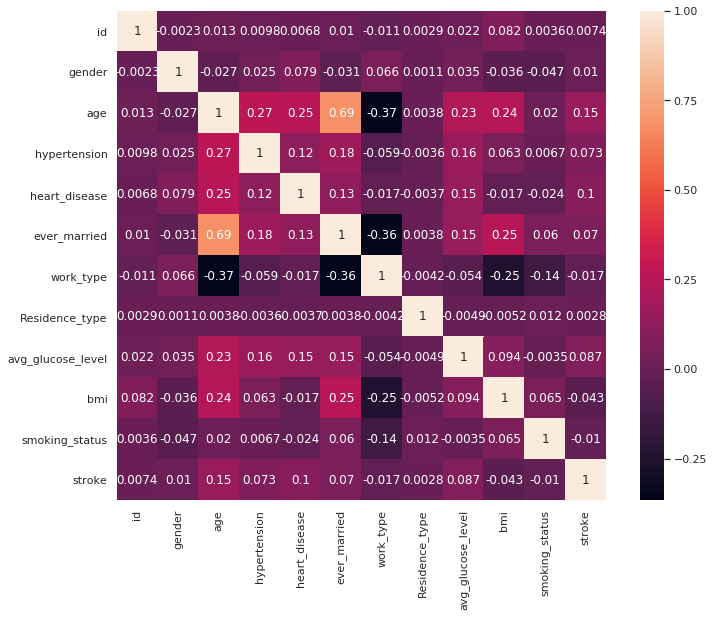

In [0]:
#Check how the correlation matrix changes after our feature engineering
#we see that age and ever_married is correlated which is logic

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

Check the data after feature engineering

In [0]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,0.019245,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,0.019245,58.0,1,0,1,2,1,87.96,39.2,2,0
2,16523,0.016576,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0.016576,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,0.019245,14.0,0,0,0,1,0,161.28,19.1,1,0


Lets start to build our models


In [0]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [0]:
# Consider some models for our problem of classification
models = []
LR_model = models.append(('LR', LogisticRegression(penalty = 'l2', solver='liblinear', multi_class='ovr')))
KNN_model = models.append(('KNN', KNeighborsClassifier(weights='uniform')))
CART_model = models.append(('CART', DecisionTreeClassifier()))

#models.append(('SVM', SVC(gamma='auto')))
SGD_model = models.append(('SGD', linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l2', random_state=2)))
XGB_model = models.append(('XGBoost', XGBClassifier(n_estimators=50)))

In [0]:
#models

In [0]:
# Prepared features
features_list = ['gender','age', 'hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level', 'work_type','smoking_status']


In [0]:
def my_cross_validation_for_roc_auc( clf, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        prediction_on_this_fold = clf.predict_proba(X_test)[:,1]
        
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
        
    return scores

In [0]:
# Obtaining which features have an impact in each model
# Feature importance
# Than create new list features for each model
features_scores = {}
scores_f = []
for name, model in models:
  print(name)
  for f in features_list:
    scores = my_cross_validation_for_roc_auc(model, train[[f]] , train['stroke'])
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)

LR
gender 0.4817542955444707
age 0.8366076869311634
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.47530819779702477
avg_glucose_level 0.6139074419876318
work_type 0.5226175854101948
smoking_status 0.5173253081095717
KNN
gender 0.5123750205813817
age 0.5508237989437605
hypertension 0.5165726664923618
heart_disease 0.5
ever_married 0.5
Residence_type 0.5
avg_glucose_level 0.505994919417059
work_type 0.5114928021027225
smoking_status 0.5408330904696299
CART
gender 0.5182457044555294
age 0.8228435455404479
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.49321198951765294
avg_glucose_level 0.49206327961442364
work_type 0.6068049732633557
smoking_status 0.5854061511636889
SGD
gender 0.5182457044555294
age 0.8366076869311634
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.47369911920623886
avg_gluco

In [0]:
# Choose the features which mean values for all models is more than 0.5 
features_list_all = ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type', 'smoking_status']


In [0]:
# Try to obtain diff results on diff features in each model
results=[]
names=[]
mean_results=[]
std_results=[]
for name, model in models:
  #for f in features_list_all:
    kfold = model_selection.KFold(n_splits=5, random_state=0)
    cv_results = model_selection.cross_val_score(model, train[features_list_all], train['stroke'], cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("CV_scores", cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    mean_results.append(cv_results.mean())
    std_results.append(cv_results.std())
    print(msg)
    print('\n')
    

In [0]:
df=pd.DataFrame(data=results, index=names, columns=['CV1_score','CV2_score','CV3_score','CV4_score','CV5_score'])
df['mean'] = mean_results
df['std'] = std_results
df

,CV1_score,CV2_score,CV3_score,CV4_score,CV5_score,mean,std
LR,0.983503,0.983167,0.984000,0.979500,0.981500,0.982334,0.001647
KNN,0.983003,0.983167,0.983667,0.979333,0.981000,0.982034,0.001628
CART,0.968005,0.966000,0.959667,0.963167,0.963000,0.963968,0.002846
SGD,0.979503,0.982500,0.984000,0.979500,0.951167,0.975334,0.012209
XGBoost,0.983503,0.983167,0.984000,0.979500,0.981500,0.982334,0.001647


In [0]:
# Use three models
# LogRegression; SGDClass; XGBClass
lr = LogisticRegression(penalty = 'l2', solver='liblinear', multi_class='ovr')
sgd = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l2', random_state=2)
xgb = XGBClassifier(n_estimators=50)
# Fitting our selected models
lr.fit(train[features_list_all], train['stroke'])
sgd.fit(train[features_list_all], train['stroke'])
xgb.fit(train[features_list_all], train['stroke'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# Predictions
prediction_LR = lr.predict_proba(test[features_list_all])[:,1]
prediction_SGD = sgd.predict_proba(test[features_list_all])[:,1]
prediction_XGB = xgb.predict_proba(test[features_list_all])[:,1]

In [0]:
# Write into csv files
sample['stroke'] = prediction_LR
sample.to_csv('submit_LR.csv', index=None)
sample['stroke'] = prediction_SGD
sample.to_csv('submit_SGD.csv', index=None)
sample['stroke'] = prediction_XGB
sample.to_csv('submit_XGB.csv', index=None)

#Conclusion and results 

In [0]:
#Ther results obtained from Kaggle
#SGD_SCORE = 0.85530
#XGB_SCORE = 0.85657
#LR_SCORE = 0.86559

In [0]:
#
#I used three models: LogRegression; SGDClassifier; XGBClassifier. Just widespread methods for classification which are well worked in such cases
#from the results i conlude that the best one is LogRegression
#i used almost all features beside bmi and residence_type
#because the distibutions of bmi depended on stroke have the same shape, and i thought that the variable'll not play a role
#also i did the cross validation (roc_auc) on features and saw that for the models feature score is less then 0.5
#